In [19]:
import cv2  # import opencv library
import os   # for Directories
import matplotlib.pyplot as plt # for visualizing images
import numpy as np # for passing labels in train function 
# visualizing the plots in jupyter
%matplotlib inline 

In [20]:
# Function for detecting faces
def detect_faces(img):
    # as the detection is always done in gray images
    gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # getting the knowledge file
    lbp_cascade_face = cv2.CascadeClassifier('opencv-files/lbpcascade_frontalface.xml')
    # detecting the faces
    faces = lbp_cascade_face.detectMultiScale(gray_image, scaleFactor = 1.2, minNeighbors = 5)
    #if no face is found
    if(len(faces)==0):
        return None,None
    # else getting the co-ordinates
    (x,y,w,h) = faces[0]
    
    return gray_image[y:y+w, x:x+h] , faces[0] 

In [21]:
# Function for preparing the data
def prepare_data(data_path):
    #initializing the faces and label to null
    faces = []
    labels = []
    # getting the directory using os
    dir_path = os.listdir(data_path)
    # looping in the training directory, we have two sub folders (s1,s2)
    for dir_name in dir_path:
        #giving label an integer value
        label = int(dir_name)
        #the sub directory
        sub_dir_path = data_path + "/" + dir_name
        sub_dir = os.listdir(sub_dir_path)
        
        for image_dir_path in sub_dir:
            #giving images their path
            image_path = sub_dir_path + "/" + image_dir_path
            # reading an image
            img = cv2.imread(image_path)
            # getting the face of each image
            face , rect = detect_faces(img)
            #check if face is present
            if face is not None:
                #append the faces and label
                faces.append(face)
                labels.append(label)
    return faces , labels

In [22]:
# Getting all the images and their respective labels
faces , labels = prepare_data('training-data')

Total Faces : 18
Total Labels : 18


In [23]:
# creating a LBPH face recognizer
recognizer = cv2.face_LBPHFaceRecognizer.create()

In [24]:
# Training the face images
recognizer.train(faces , np.array(labels))

In [25]:
name = [ 'Barack Obama' , 'David Beckham']

In [40]:
# Function for predicting the face
def predict_face(test_image):
    # making a copy of your test image
    img = test_image.copy()
    # Getting face and coordinates of test image
    face , rect = detect_faces(img)
    # Predicting the test image and getting its label
    label = recognizer.predict(face)
    # getting it's corresponding name
    final_name = name[label[0]]
    # Getting the coordinates
    (x,y,w,h) = rect
    # Converting to RGB image
    final_image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #Detecting the face
    cv2.rectangle(final_image,(x,y),(x+w,y+h),(0,255,0),2)
    # Writing the name on that
    cv2.putText(final_image,final_name,(x,y-5),cv2.FONT_HERSHEY_PLAIN,1.2,(0,255,0),2)
    #returning the final image
    return final_image

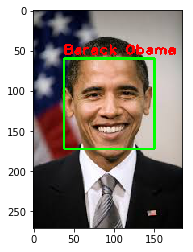

In [41]:
# Getting the test image
test_image = cv2.imread('test-data/test1.jpg')
# Predicting the image andd getting the final image with name
final_image = predict_face(test_image)
# visualize the final image
plt.imshow(final_image)